# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut,train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
% matplotlib inline


In [35]:
from sklearn.datasets import load_iris

In [43]:
irisRaw=load_iris()

In [41]:
iris_data.shape

(151, 5)

In [48]:
iris_data = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])

In [49]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [50]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [55]:

x=iris_data.iloc[:,[0,1,2,3]]
y=iris_data.iloc[:,4]

In [ ]:
cv_scores=[[],[]]
p=0
for j in [5,10]:
    for i in range(1,11) :
        knn = KNeighborsClassifier(n_neighbors=i)
        scores=1-cross_val_score(knn,x,y,cv=j,scoring='accuracy')
        cv_scores[p].append(scores.mean())
    p=p+1
print(cv_scores)

In [56]:
cv_scores=[[],[]]
p=0
for j in [5,10]:
    for i in range(1,11) :
        knn = KNeighborsClassifier(n_neighbors=i)
        scores=1-cross_val_score(knn,x,y,cv=j,scoring='accuracy')
        cv_scores[p].append(scores.mean())
    p=p+1
print(cv_scores)



[[0.039999999999999994, 0.05333333333333332, 0.033333333333333326, 0.02666666666666666, 0.02666666666666666, 0.019999999999999997, 0.019999999999999997, 0.033333333333333326, 0.02666666666666666, 0.019999999999999997], [0.039999999999999994, 0.046666666666666655, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.02666666666666666, 0.033333333333333326]]


In [57]:
leave_one_out=[]
loo=LeaveOneOut()
for i in range(1,11) :
        knn = KNeighborsClassifier(n_neighbors=i)
        scores=1-cross_val_score(knn,x,y,cv=loo,scoring='accuracy')
        leave_one_out.append(scores.mean())
print(leave_one_out)

[0.04, 0.05333333333333334, 0.04, 0.04, 0.03333333333333333, 0.04, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.02666666666666667]


In [58]:
neighbours=range(1,11)

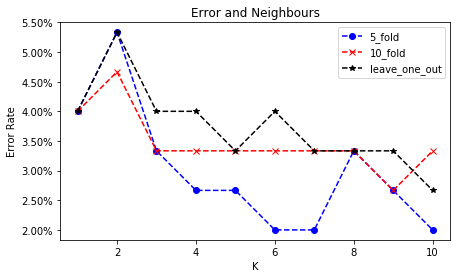

In [59]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

five_fold,=plt.plot(neighbours,cv_scores[0],color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
ten_fold,=plt.plot(neighbours,cv_scores[1],color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
leave_one_out_plot,=plt.plot(neighbours,leave_one_out,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.legend([five_fold,ten_fold,leave_one_out_plot],["5_fold","10_fold","leave_one_out"])

# Problem 2

In [115]:
train = np.loadtxt('zip.train')
test  = np.loadtxt('zip.test')

In [116]:
train.shape,test.shape

((7291, 257), (2007, 257))

In [117]:
y_train=train[:,0]
x_train=train[:,1:]
y_test=test[:,0]
x_test=test[:,1:]

In [118]:
distance_metrics=['cityblock', 'cosine', 'euclidean']
test_error=[[],[],[]]
p=0
for j in range(0,3):
    for i in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=i,metric=distance_metrics[j])
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        test_scores = 1 - accuracy_score(y_test, y_pred)
        test_error[p].append(test_scores)
    p=p+1
print(test_error)
        
        
        


[[0.06228201295465874, 0.06875934230194325, 0.058295964125560484, 0.06228201295465874, 0.06278026905829592, 0.06626806178375688, 0.06776283009466866, 0.0722471350274041, 0.07324364723467858, 0.07473841554559046], [0.057299451918286004, 0.05879422022919778, 0.05430991529646234, 0.05680119581464871, 0.0577977080219233, 0.06427503736920781, 0.06128550074738415, 0.05979073243647237, 0.06327852516193322, 0.064773293472845], [0.05630293971101141, 0.05879422022919778, 0.05530642750373693, 0.05680119581464871, 0.05530642750373693, 0.06128550074738415, 0.058295964125560484, 0.059292476332835076, 0.06278026905829592, 0.06427503736920781]]


In [124]:
min(test_error[1]),min(test_error[2])

(0.05430991529646234, 0.05530642750373693)

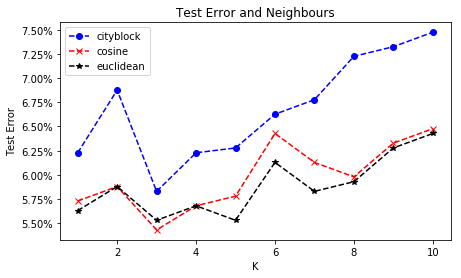

In [73]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

cityblock,=plt.plot(neighbours,test_error[0],color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
cosine,=plt.plot(neighbours,test_error[1],color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
euclidean,=plt.plot(neighbours,test_error[2],color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([cityblock,cosine,euclidean],["cityblock","cosine","euclidean"])

# Problem 3

In [19]:
def squared_inverse(x):
    return(1/x**2)

In [20]:
def linear_weight(x):
        k=x.shape[1]
        x=x.transpose()
        weights=((x[k-1,:]-x)/(x[k-1,:]-x[0,:])).transpose()
        return weights

In [83]:
test_error_inverse_weight=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_inverse_weight.append(test_scores)
print(test_error_inverse_weight)

[0.05630293971101141, 0.05630293971101141, 0.05480817140009964, 0.052815146985550565, 0.05480817140009964, 0.05480817140009964, 0.05630293971101141, 0.05530642750373693, 0.06078724464374685, 0.05979073243647237]


In [87]:
test_error_inverse_squared_weight=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i,weights=squared_inverse)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_inverse_squared_weight.append(test_scores)
print(test_error_inverse_squared_weight)

[0.05630293971101141, 0.05630293971101141, 0.05430991529646234, 0.05231689088191327, 0.053811659192825156, 0.053811659192825156, 0.05530642750373693, 0.053811659192825156, 0.05879422022919778, 0.059292476332835076]


In [127]:
test_error_linear_weight=[]
for i in range(2,12):
    knn = KNeighborsClassifier(n_neighbors=i,weights=linear_weight)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_linear_weight.append(test_scores)
print(test_error_linear_weight)

[0.05630293971101141, 0.05630293971101141, 0.05580468360737423, 0.05082212257100149, 0.051818634778276085, 0.051818634778276085, 0.0503238664673642, 0.05082212257100149, 0.05132037867463879, 0.05132037867463879]


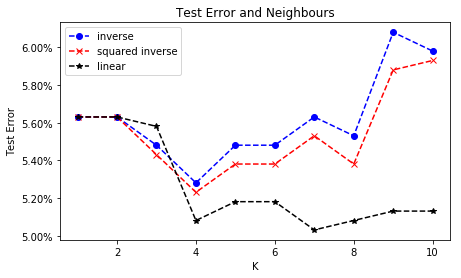

In [128]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

inverse_w,=plt.plot(neighbours,test_error_inverse_weight,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
sq_inverse_w,=plt.plot(neighbours,test_error_inverse_squared_weight,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
linear_w,=plt.plot(neighbours,test_error_linear_weight,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([inverse_w,sq_inverse_w,linear_w],["inverse","squared inverse","linear"])

# Problem 4

In [89]:
import math
import operator
import numpy.linalg as LA
import time

In [81]:
def euclideanDistance(instance1, instance2):
 
    return LA.norm(instance1 - instance2)

In [82]:
def getCentroid(arr):
    length = arr.shape[0] # num of points
    return arr.sum(0) / length

In [83]:
def fit(x_train, y_train):
    classes = set(y_train)
    numClass = len(classes)
    class_train = {}
    for i in range(len(x_train)):
        key = y_train[i]
        value = x_train[i]
        if key not in class_train.keys():
            class_train[key] = []
        class_train[key].append(value)
    return class_train

In [101]:
def predict(class_train, x_test, k):
    predictions = []
    keys = class_train.keys()
    
    for x in x_test:
        class_dist = [] # to store [ key, centroid_dist]
        for key in keys:
            value = np.array(class_train[key])
            distances = LA.norm(x - value, axis = 1)           
            idx = np.argsort(distances)
            # use k nearest neighbors to find centroid point and calculate centroid dist through eculideanDistance
            kNearestNeighbors = value[idx[0:k]]
            
            centroid = getCentroid( kNearestNeighbors )
            centroid_dist = LA.norm(centroid - x) 
            
            # add centroid_dist to class_dist (for sorting)
            class_dist.append ( [key, centroid_dist] )
        
        # sort centroid_dist of x
        #class_dist.sort(key=operator.itemgetter(1))
        class_dist = np.array(class_dist)
        rsp_idx = np.argsort(class_dist[:,1])
        # predict y result for x
        #predictions.append(class_dist[0][0])
        predictions.append(class_dist[rsp_idx[0]][0])
             
    return predictions


  

In [103]:
test_error_kCentroid = []
for k in range(1,11):
    
    start = time. time()
    c_train = fit(x_train, y_train)

    trainTime = time. time()

    y_pred = predict(c_train, x_test[:], k)

  

    predictTime = time. time()

    test_scores = 1 - accuracy_score(y_test[:], y_pred)
    test_error_kCentroid.append(test_scores)
    
    end = time. time()

    print("time for k = ",k," is: ", end - start)
    
print(test_error_kCentroid)

time for k =  1  is:  27.251490831375122
time for k =  2  is:  27.552947998046875
time for k =  3  is:  27.45411491394043
time for k =  4  is:  28.53536891937256
time for k =  5  is:  26.730284214019775
time for k =  6  is:  26.27116584777832
time for k =  7  is:  26.705485820770264
time for k =  8  is:  27.926899909973145
time for k =  9  is:  27.430617094039917
time for k =  10  is:  27.70802116394043
[0.05630293971101141, 0.05430991529646234, 0.0503238664673642, 0.04434479322371698, 0.04783258594917783, 0.048330842052815126, 0.04783258594917783, 0.04783258594917783, 0.047334329845540646, 0.0498256103637269]


Text(0,0.5,'Test Error')

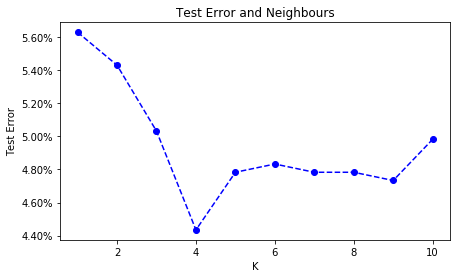

In [105]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

plt.plot(neighbours,test_error_kCentroid,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Test Error')



In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
#optimal k=4
c_train = fit(x_train, y_train)

trainTime = time. time()

y_pred = predict(c_train, x_test[:], 4)



In [137]:
y_pred=np.asarray(y_pred)

In [138]:
confusion_matrix(y_test,y_pred)

array([[355,   0,   2,   0,   1,   0,   0,   0,   0,   1],
       [  0, 256,   1,   0,   3,   0,   3,   1,   0,   0],
       [  3,   0, 188,   2,   0,   0,   1,   1,   3,   0],
       [  1,   0,   4, 150,   0,  11,   0,   0,   0,   0],
       [  0,   1,   0,   0, 189,   2,   0,   2,   0,   6],
       [  1,   0,   2,   1,   0, 152,   0,   0,   2,   2],
       [  0,   0,   1,   0,   3,   3, 163,   0,   0,   0],
       [  0,   0,   1,   1,   3,   0,   0, 139,   2,   1],
       [  0,   0,   2,   4,   0,   2,   2,   0, 153,   3],
       [  0,   0,   0,   0,   1,   0,   0,   2,   1, 173]])

# Problem 5

In [2]:
breastcancer=pd.read_csv('breastcancer.csv')

In [3]:
breastcancer.head(5)

,Unnamed: 0,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,1,5,1,1,1,2,1,3,1,1,2
1,2,5,4,4,5,7,10,3,2,1,2
2,3,3,1,1,1,2,2,3,1,1,2
3,4,6,8,8,1,3,4,3,7,1,2
4,5,4,1,1,3,2,1,3,1,1,2


In [4]:
breastcancer.shape

(699, 11)

In [5]:
breastcancer=breastcancer.drop(breastcancer.columns[0],1)

In [6]:
breastcancer_x=breastcancer.iloc[:,[0,1,2,3,4,5,6,7,8]]

In [7]:
breastcancer_y=breastcancer.iloc[:,9]

In [8]:
#try different cross-validation 
cv_scores=[[],[]]
p=0
for j in [5,10]:
    for i in range(1,11) :
        knn = KNeighborsClassifier(n_neighbors=i)
        scores=1-cross_val_score(knn,breastcancer_x,breastcancer_y,cv=j,scoring='accuracy')
        cv_scores[p].append(scores.mean())
    p=p+1
print(cv_scores)

[[0.04845043114444614, 0.0613692389553403, 0.03853192218261865, 0.03991982098212008, 0.03708279576946345, 0.04133811491839965, 0.03705210907262033, 0.04417499435102377, 0.04274627714241981, 0.041317705713848366], [0.047044586358732085, 0.05710669815997434, 0.03708541101682559, 0.03706470708307817, 0.034186860292187905, 0.034186860292187905, 0.03134925494998979, 0.03561484851135799, 0.03273700172046773, 0.035574023853264504]]


In [227]:
min(cv_scores[1])

0.03134925494998979

In [175]:
leave_one_out=[]
loo=LeaveOneOut()
for i in range(1,11) :
        knn = KNeighborsClassifier(n_neighbors=i)
        scores=1-cross_val_score(knn,breastcancer_x,breastcancer_y,cv=loo,scoring='accuracy')
        leave_one_out.append(scores.mean())
print(leave_one_out)

[0.04291845493562232, 0.060085836909871244, 0.034334763948497854, 0.03719599427753934, 0.031473533619456366, 0.032904148783977114, 0.032904148783977114, 0.032904148783977114, 0.031473533619456366, 0.032904148783977114]


In [228]:
min(leave_one_out)

0.031473533619456366

In [176]:
neighbours=range(1,11)

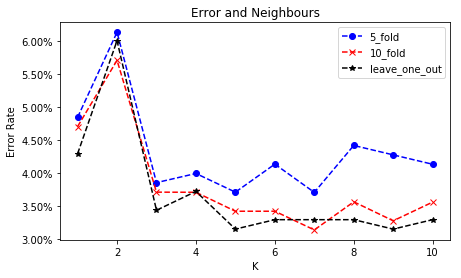

In [177]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

five_fold,=plt.plot(neighbours,cv_scores[0],color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
ten_fold,=plt.plot(neighbours,cv_scores[1],color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
leave_one_out_plot,=plt.plot(neighbours,leave_one_out,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.legend([five_fold,ten_fold,leave_one_out_plot],["5_fold","10_fold","leave_one_out"])

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(
...     breastcancer_x, breastcancer_y, test_size=0.1, random_state=123)

In [12]:
#try different distance matrics 
distance_metrics=['cityblock', 'cosine', 'euclidean']
test_error=[[],[],[]]
p=0
for j in range(0,3):
    for i in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=i,metric=distance_metrics[j])
        knn.fit(x_train_bc, y_train_bc)
        y_pred = knn.predict(x_test_bc)
        test_scores = 1 - accuracy_score(y_test_bc, y_pred)
        test_error[p].append(test_scores)
    p=p+1
print(test_error)
        

[[0.014285714285714235, 0.042857142857142816, 0.042857142857142816, 0.0714285714285714, 0.08571428571428574, 0.08571428571428574, 0.0714285714285714, 0.0714285714285714, 0.05714285714285716, 0.05714285714285716], [0.15714285714285714, 0.1428571428571429, 0.12857142857142856, 0.12857142857142856, 0.11428571428571432, 0.1428571428571429, 0.12857142857142856, 0.1428571428571429, 0.12857142857142856, 0.12857142857142856], [0.042857142857142816, 0.042857142857142816, 0.014285714285714235, 0.02857142857142858, 0.02857142857142858, 0.042857142857142816, 0.02857142857142858, 0.042857142857142816, 0.02857142857142858, 0.05714285714285716]]


In [14]:
neighbours=range(1,11)

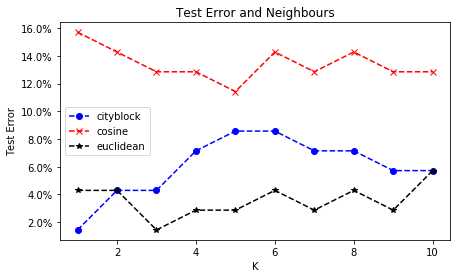

In [15]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

cityblock,=plt.plot(neighbours,test_error[0],color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
cosine,=plt.plot(neighbours,test_error[1],color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
euclidean,=plt.plot(neighbours,test_error[2],color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([cityblock,cosine,euclidean],["cityblock","cosine","euclidean"])

In [16]:
distance_metrics=['cityblock', 'cosine', 'euclidean']

In [24]:
x_train=x_train_bc
y_train=y_train_bc
y_test=y_test_bc
x_test=x_test_bc

In [25]:
# pick cosine distance
test_error_inverse_weight=[[],[],[]]

for j in range(0,3):
    for i in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=i,weights='distance',metric=distance_metrics[j])
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        test_scores = 1 - accuracy_score(y_test, y_pred)
        test_error_inverse_weight[j].append(test_scores)
print(test_error_inverse_weight)

[[0.014285714285714235, 0.014285714285714235, 0.042857142857142816, 0.02857142857142858, 0.08571428571428574, 0.05714285714285716, 0.0714285714285714, 0.05714285714285716, 0.05714285714285716, 0.042857142857142816], [0.15714285714285714, 0.15714285714285714, 0.12857142857142856, 0.11428571428571432, 0.11428571428571432, 0.11428571428571432, 0.11428571428571432, 0.11428571428571432, 0.09999999999999998, 0.11428571428571432], [0.042857142857142816, 0.042857142857142816, 0.014285714285714235, 0.014285714285714235, 0.02857142857142858, 0.02857142857142858, 0.02857142857142858, 0.042857142857142816, 0.042857142857142816, 0.042857142857142816]]


In [26]:
test_error_inverse_squared_weight=[[],[],[]]
for j in range(0,3):
    for i in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=i,weights=squared_inverse,metric=distance_metrics[j])
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        test_scores = 1 - accuracy_score(y_test, y_pred)
        test_error_inverse_squared_weight[j].append(test_scores)
print(test_error_inverse_squared_weight)

[[0.014285714285714235, 0.014285714285714235, 0.042857142857142816, 0.02857142857142858, 0.08571428571428574, 0.05714285714285716, 0.0714285714285714, 0.042857142857142816, 0.05714285714285716, 0.042857142857142816], [0.15714285714285714, 0.15714285714285714, 0.11428571428571432, 0.11428571428571432, 0.11428571428571432, 0.11428571428571432, 0.11428571428571432, 0.11428571428571432, 0.11428571428571432, 0.09999999999999998], [0.042857142857142816, 0.042857142857142816, 0.014285714285714235, 0.014285714285714235, 0.02857142857142858, 0.02857142857142858, 0.042857142857142816, 0.042857142857142816, 0.042857142857142816, 0.042857142857142816]]


/Users/xinzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [27]:
test_error_linear_weight=[[],[],[]]
for j in range(0,3):
    for i in range(2,12):
        knn = KNeighborsClassifier(n_neighbors=i,weights=linear_weight,metric=distance_metrics[j])
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        test_scores = 1 - accuracy_score(y_test, y_pred)
        test_error_linear_weight[j].append(test_scores)
print(test_error_linear_weight)

[[0.11428571428571432, 0.02857142857142858, 0.014285714285714235, 0.014285714285714235, 0.042857142857142816, 0.042857142857142816, 0.042857142857142816, 0.042857142857142816, 0.042857142857142816, 0.05714285714285716], [0.15714285714285714, 0.15714285714285714, 0.12857142857142856, 0.12857142857142856, 0.12857142857142856, 0.12857142857142856, 0.12857142857142856, 0.12857142857142856, 0.12857142857142856, 0.12857142857142856], [0.0714285714285714, 0.042857142857142816, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.02857142857142858]]


/Users/xinzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


In [28]:
import matplotlib.pylab as pl
colors = pl.cm.jet(np.linspace(0,1,9))

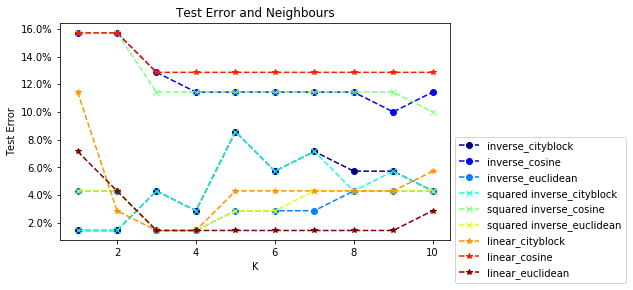

In [29]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

inverse_w_cityblock,=plt.plot(neighbours,test_error_inverse_weight[0],color=colors[0],linestyle='dashed',marker='o',
        markerfacecolor=colors[0],markersize=6)
inverse_w_cosine,=plt.plot(neighbours,test_error_inverse_weight[1],color=colors[1],linestyle='dashed',marker='o',
        markerfacecolor=colors[1],markersize=6)
inverse_w_euclidean,=plt.plot(neighbours,test_error_inverse_weight[2],color=colors[2],linestyle='dashed',marker='o',
        markerfacecolor=colors[2],markersize=6)

sq_inverse_w_cityblock,=plt.plot(neighbours,test_error_inverse_squared_weight[0],color=colors[3],linestyle='dashed',marker='x',
        markerfacecolor=colors[3],markersize=6)
sq_inverse_w_cosine,=plt.plot(neighbours,test_error_inverse_squared_weight[1],color=colors[4],linestyle='dashed',marker='x',
        markerfacecolor=colors[4],markersize=6)
sq_inverse_w_euclidean,=plt.plot(neighbours,test_error_inverse_squared_weight[2],color=colors[5],linestyle='dashed',marker='x',
        markerfacecolor=colors[5],markersize=6)

linear_w_cityblock,=plt.plot(neighbours,test_error_linear_weight[0],color=colors[6],linestyle='dashed',marker='*',
        markerfacecolor=colors[6],markersize=6)
linear_w_cosine,=plt.plot(neighbours,test_error_linear_weight[1],color=colors[7],linestyle='dashed',marker='*',
        markerfacecolor=colors[7],markersize=6)
linear_w_euclidean,=plt.plot(neighbours,test_error_linear_weight[2],color=colors[8],linestyle='dashed',marker='*',
        markerfacecolor=colors[8],markersize=6)


ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([inverse_w_cityblock,inverse_w_cosine,inverse_w_euclidean,
            sq_inverse_w_cityblock,sq_inverse_w_cosine,sq_inverse_w_euclidean,
            linear_w_cityblock,linear_w_cosine,linear_w_euclidean],
           ["inverse_cityblock","inverse_cosine","inverse_euclidean",
            "squared inverse_cityblock","squared inverse_cosine","squared inverse_euclidean",
            "linear_cityblock","linear_cosine","linear_euclidean"],loc='upper left',bbox_to_anchor=(1, 0.5))

In [229]:
min(test_error_linear_weight[2])

0.0503238664673642